In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import nltk

In [2]:
df_true = pd.read_csv("Dataset/True.csv")
df_false = pd.read_csv("Dataset/Fake.csv")

In [3]:
#Add category
df_true["Category"] = 1
df_false["Category"] = 0
print("True News : ", df_true.title.count())
print("False News : ", df_false.title.count())
#Merge into one dataset
df_dataset = pd.concat([df_true, df_false])
print("Dataset : ", df_dataset.title.count())

True News :  21417
False News :  23481
Dataset :  44898


In [4]:
df_dataset["Body"] = df_dataset["title"] + df_dataset["text"]
df_dataset.head()

del df_dataset["text"]
del df_dataset["title"]
del df_dataset["subject"]
del df_dataset["date"]

df_dataset.Body.count()

44898

In [5]:
df_dataset.head()

,Category,Body
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [6]:
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [7]:
stopwords = set(stopwords.words('english'))
print(stopwords)

{'there', 'only', 'just', 'am', 'once', "she's", "shan't", "don't", 'all', 'both', 'with', 'her', "it's", 'so', 'where', 'don', 'an', 'any', 'isn', "doesn't", "mustn't", 'out', 'shan', 'our', 'own', 'and', "aren't", 'about', 'from', 'down', 'm', 'she', "hadn't", 'themselves', 'y', 'i', 'above', 'to', 'him', 'needn', 'aren', 'will', 'can', 'some', 'in', 'other', "haven't", 'ma', 'was', 'while', 'here', 'into', 'be', 'why', "didn't", 'didn', 'on', 'yourself', 're', 'such', 'd', 's', 'weren', 'the', 'has', 'yourselves', 'its', 'nor', 'at', "weren't", 'whom', 'if', 'under', "wasn't", 'them', "isn't", 'ourselves', 'o', 'or', 'than', 'wasn', 'have', 'does', 'mightn', 'theirs', 'those', 'are', 'between', 'again', 'it', 'is', 'had', 'no', 'then', 'yours', 'won', 'were', 'shouldn', 'been', "needn't", 'itself', 'now', 'before', 'as', 'that', 'more', "won't", 'but', 'up', 'these', 'by', "couldn't", "you'd", 'off', 'most', 'haven', 'their', 'hers', 'of', "mightn't", 'having', 'against', 'further',

In [8]:
df_dataset["Body"]
print(df_dataset["Body"])
df_dataset["Body"].count()

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
5        White House, Congress prepare for talks on spe...
6        Trump says Russia probe will be fair, but time...
7        Factbox: Trump on Twitter (Dec 29) - Approval ...
8        Trump on Twitter (Dec 28) - Global WarmingThe ...
9        Alabama official to certify Senator-elect Jone...
10       Jones certified U.S. Senate winner despite Moo...
11       New York governor questions the constitutional...
12       Factbox: Trump on Twitter (Dec 28) - Vanity Fa...
13       Trump on Twitter (Dec 27) - Trump, Iraq, Syria...
14       Man says he delivered manure to Mnuchin to pro...
15       Virginia officials postpone lottery drawing to...
16       U.S. lawmakers question businessman at 2016 Tr.

44898

In [9]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import re
import string
from bs4 import BeautifulSoup

In [10]:
def clean_text(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = text.replace('[^\w\s]','')
    text = text.replace(r"[\"\',]", '')
    text = re.sub('\[[^]]*\]', '', text)
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)
    text = text.replace('[^\w\s]','')
    final_text = []
    for i in text.split():
#         print(i.strip().lower())
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
    

In [11]:
df_dataset['Body'] = df_dataset['Body'].apply(clean_text)
print(df_dataset["Body"][0])

/home/arkasarkar/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:335: UserWarning: "https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/arkasarkar/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:335: UserWarning: "https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpghttps://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/ar

0    U.S. budget fight looms, Republicans flip fisc...
0    Donald Trump Sends Embarrassing New Year’s Eve...
Name: Body, dtype: object


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(df_dataset.Body, df_dataset.Category, test_size = 0.2, random_state = 0)

In [14]:
print(X_train[0])
print(X_test)
print(Y_train)
print(Y_test)

0    U.S. budget fight looms, Republicans flip fisc...
0    Donald Trump Sends Embarrassing New Year’s Eve...
Name: Body, dtype: object
13888    RUBIO Sides Democrats Giving Whopping $2 Billi...
7763     Ted Cruz Says Endorsing Trump ‘Grave Mistake’,...
8388     ‘Responsible Gun Owner’ Road Rages, Threatens ...
16820    TEACHER’S UNION PROTEST Gets Ugly Protesters C...
5099     Etihad advises checks U.S. missions new Trump ...
5812     Factbox: Trump U.S. Supreme Court pick could a...
2747     Trump asks Supreme Court block travel ban ruli...
13264    BREAKING BOMBSHELL: Dem Congressmen Phone Numb...
12157    Security tight Germany marks anniversary Chris...
10120    ALT-LEFT Fake News Media Refuses Tell media tr...
15962    Russia hand suspect Montenegro coup attempt: R...
8222     U.S. House Speaker Ryan: Pacific trade deal fa...
18642    “This TOTALLY FAKE!” Tucker Loses Temper Russi...
3151     Trump likely nominate former Senate aide Peirc...
22120    MASS INTEGRATION: Race Capita

In [15]:
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)
# X_test = np.array(X_test)
# Y_test = np.array(Y_test)

In [16]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(35918,)
(35918,)
(8980,)
(8980,)


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# print(word_index)

In [19]:
tokenized_train = tokenizer.texts_to_sequences(X_train)
# print(tokenized_train)
padded = pad_sequences(tokenized_train, maxlen = 300)
X_train = padded
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=300)

In [20]:
print(X_train)
print(X_test)
print(padded.shape)

[[   0    0    0 ... 3082  813  295]
 [   0    0    0 ... 3925  481  396]
 [   0    0    0 ... 2895  481  396]
 ...
 [   0    0    0 ...   76 2710 1405]
 [2124 8239 4190 ...  288 1066  642]
 [   0    0    0 ... 3347  755 4497]]
[[   0    0    0 ... 2992  403  673]
 [   0    0    0 ...  109   76 3222]
 [   0    0    0 ...  109   76 3355]
 ...
 [   0    0    0 ... 3172 2121 1710]
 [   0    0    0 ...  260 3067  747]
 [   0    0    0 ... 3304  233 1023]]
(35918, 300)


In [21]:
#its important to use the glove.twitter.27B.100d.txt embeddings 
# embedding_dict = {}
# with open("/home/arkasarkar/Desktop/DL_projects/glove.twitter.27B.100d.txt", 'r', encoding = "utf-8") as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         vector = np.asarray(values[1:], "float32")
# #         print(word,vector)
#         embedding_dict[word] = vector

def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open("/home/arkasarkar/Desktop/DL_projects/glove.twitter.27B.100d.txt"))

In [22]:
print((embeddings_index["trump"]))

[-0.24645    0.45248    0.8372     0.1301    -0.10773   -0.23649
 -0.022622  -0.19291    0.0089398 -0.42653    0.46929   -0.2226
 -1.5809    -0.50369    0.302     -0.032982  -0.82088   -0.30826
  0.32375    0.079145   0.45206   -0.60606   -0.021866   0.33313
 -0.023317   0.44279    0.47152   -0.037821  -0.072843  -0.72901
  0.65716    0.19021   -0.34567   -0.71308    0.034026   0.30534
 -0.21855    0.024003  -0.14556   -0.68436    0.93626    0.12909
 -0.17345   -0.68616    0.011613   0.32246   -0.48218   -0.12962
 -0.12519    0.36592   -0.058803  -0.99927   -0.39455    0.29715
 -0.44197    0.16283    0.17432   -0.74203   -0.41865    0.21203
  0.18244   -0.020944   0.051607  -0.17384    0.16151   -0.39944
  0.52242    0.55355   -0.70574    0.1701    -0.22219   -0.61542
 -0.31061   -0.29061    0.10021   -0.058518   0.19118    0.8167
  0.092544   0.25594    0.8109    -0.14547   -0.25681    0.37606
 -0.74676   -0.41652    0.29502   -0.39016   -0.55615   -0.50449
 -0.55999   -0.63991    0.0

In [23]:
max_features = 10000
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/home/arkasarkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [24]:
print(embedding_matrix.shape)

(10000, 100)


In [25]:
import math
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

Using TensorFlow backend.


In [26]:
ACCURACY_THRESHOLD = 0.98

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

def step_decay(epochs):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

checkpoint = ModelCheckpoint("model_checkpoints_weights/model_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='loss', verbose=1,save_best_only=True, mode='auto', period=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [31]:
model = Sequential([
    Embedding(max_features, output_dim = embedding_matrix.shape[1], weights = [embedding_matrix], input_length = 300, trainable = False),
#     LSTM(128, return_sequences = True),
    LSTM(128, return_sequences = True, recurrent_dropout = 0.25 , dropout = 0.25),
    LSTM(64, recurrent_dropout = 0.1 , dropout = 0.1),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')   
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
unified_lstm_3 (UnifiedLSTM) (None, 300, 128)          117248    
_________________________________________________________________
unified_lstm_4 (UnifiedLSTM) (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [32]:
history = model.fit(X_train, Y_train , validation_data = (X_test,Y_test), batch_size = 256 , epochs = 10 , callbacks = [checkpoint,learning_rate_reduction])

Train on 35918 samples, validate on 8980 samples
Epoch 1/10
35840/35918 [============================>.] - ETA: 0s - loss: 0.4084 - accuracy: 0.8048
Epoch 00001: loss improved from inf to 0.40800, saving model to model_checkpoints_weights/model_weights-01-0.88.hdf5
35918/35918 [==============================] - 266s 7ms/sample - loss: 0.4080 - accuracy: 0.8051 - val_loss: 0.2717 - val_accuracy: 0.8850
Epoch 2/10
35840/35918 [============================>.] - ETA: 0s - loss: 0.2812 - accuracy: 0.8790
Epoch 00002: loss improved from 0.40800 to 0.28108, saving model to model_checkpoints_weights/model_weights-02-0.87.hdf5
35918/35918 [==============================] - 262s 7ms/sample - loss: 0.2811 - accuracy: 0.8791 - val_loss: 0.3584 - val_accuracy: 0.8680
Epoch 3/10
35840/35918 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9107
Epoch 00003: loss improved from 0.28108 to 0.21794, saving model to model_checkpoints_weights/model_weights-03-0.93.hdf5
35918/35918 [=

In [ ]:
print(Y_train.shape)

No handles with labels found to put in legend.


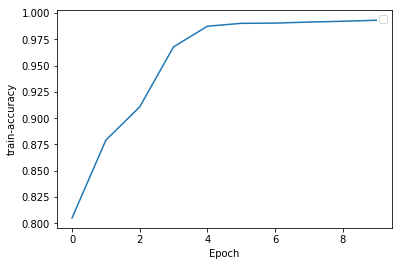

In [41]:
import matplotlib.pyplot as plt
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
plt.plot(train_acc)
plt.xlabel("Epoch")
plt.ylabel("train-accuracy")
plt.show()



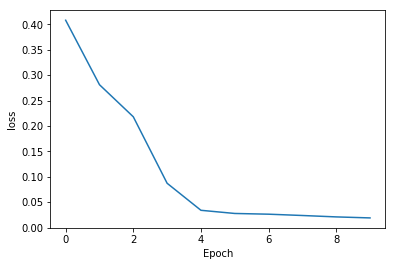

In [40]:
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [42]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
